## Krishna Thiyagarajan & Shalin Patel 
### ECE-302: Probability and Stochastic Processes
### Professor Sam Keene
### 'MATLAB' Assignment 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'FreeSerif',
        'size'   : 18}
plt.rc('text', usetex=True)
matplotlib.rc('font', **font)
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.numpoints'] = 1
from scipy.stats import norm


In [2]:
# Problem 1: Radar Detection

# Variance and standard deviation of nois
var_x = 3
sig_x = np.sqrt(var_x)

# Amplitude of signal
a = 8

# Signal not present and signal present probabilities
p = 0.2
q = 1 - p

n = 1000 # Number of trials

In [3]:
# Part A

def prob(y, present, a=8):
    return (1/np.sqrt(2 * np.pi * var_x))*np.exp(-(y-(a if present else 0))**2/(2*var_x))

n_err = 0

for ii in range(int(n)):
    sent = np.random.random()
    noise = np.random.normal(0, sig_x, 1)
    if sent <= p: 
        y = a + noise
        if prob(y, True) * p < prob(y, False) * q:
            n_err+=1
    else:
        y = noise
        if prob(y, True) * p >= prob(y, False) * q:
            n_err+=1

prob_err = n_err/float(n)
print("Simulated Probability of Error: ", prob_err)

# Theoretical Probability of Error with different means but same variances

err_rule = (2 * var_x * np.log(4) + a**2)/ (2 * a)
prob_false_alarm = norm.cdf(err_rule, loc=a, scale=sig_x)
prob_false_negative = 1 - norm.cdf(err_rule, loc=0, scale=sig_x)

prob_err_theo = prob_false_alarm * p + prob_false_negative * q
print("Theoretical Probability of Error: ", prob_err_theo)



Simulated Probability of Error:  0.009
Theoretical Probability of Error:  0.00807749576503834


/home/krishna/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


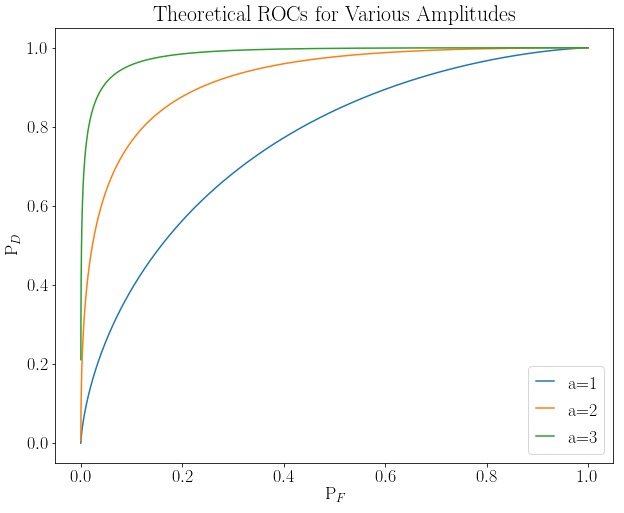

In [15]:
# Part B

# Theoretical ROC
eta1 = np.arange(0, 1000, 0.001)
l_eta1 = len(eta1)
num_amplitudes = 3
p_d_total = np.zeros((num_amplitudes, l_eta1))
p_f_total = np.zeros((num_amplitudes, l_eta1))

plt.figure(figsize=(10, 8))
for n, a in enumerate(range(1, num_amplitudes+1)):
    err_rule = (2*var_x*np.log(eta1)+a**2)/(2*a);
    p_d_total[n, : ] = 1 - norm.cdf(err_rule, loc=a, scale = sig_x)
    p_f_total[n, :] = 1 - norm.cdf(err_rule, loc=0, scale=sig_x)
    plt.plot(p_f_total[n, :], p_d_total[n, :], label='a=%d' % a)

plt.title('Theoretical ROCs for Various Amplitudes')
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.legend()
plt.show()

In [5]:
# Simulated ROC

n_trials = 1000
eta2 = np.arange(0, 500, 0.4)
l_eta2 = len(eta2)
pd_snr = np.zeros((num_amplitudes, l_eta2))
pf_snr = np.zeros((num_amplitudes, l_eta2))

for k, a in enumerate(range(1, num_amplitudes+1)):
    pd_eta = np.zeros((1, l_eta2))
    pf_eta = np.zeros((1, l_eta2))
    for n, s in enumerate(eta2):
        n_h1_h1 = 0
        n_h1_h0 = 0
        n_pres = 0
        n_abs = 0
        for ii in range(n_trials):
            
            
            if np.random.rand() <= p:
                n_pres+=1
                y = a + np.random.normal(0, sig_x, 1)
                if prob(y, True, a) >= prob(y, False, a) * s:
                    n_h1_h1 +=1
            else: 
                n_abs +=1
                y = np.random.normal(0, sig_x, 1)
                if prob(y, True, a) >= prob(y, False, a) * s: 
                    n_h1_h0+=1
        pd_temp = n_h1_h1/n_pres
        pf_temp = n_h1_h0/n_abs
        pd_eta[0, n] = pd_temp
        pf_eta[0, n] = pf_temp
    pd_snr[k, :] = pd_eta[0 ,:]
    pf_snr[k, :] = pf_eta[0, :]

0 1
1 2
2 3


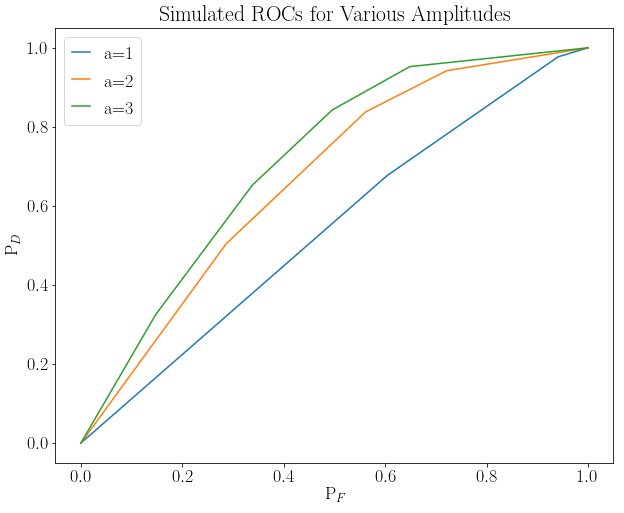

In [16]:
plt.figure(figsize=(10, 8))
for n, a in enumerate(range(1, 4)):
    print(n, a)
    plt.plot(pf_snr[n, :], pd_snr[n, :], label='a=%d' % a)
plt.legend()
plt.title('Simulated ROCs for Various Amplitudes')
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.show()

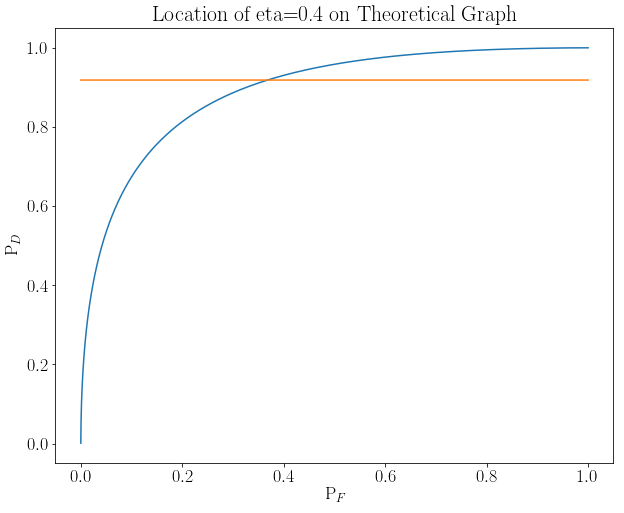

In [7]:
# Part C
#  prob(y, True) *p (H1)>< (H0)prob(y,False) *q/10

a = 3
loc1 = np.where(eta1 ==4/10)
loc2 = np.where(eta2 == 4/10)

plt.figure(figsize=(10, 8))
plt.plot(p_f_total[2,:], p_d_total[2,:])
plt.plot(p_f_total[2,:], np.ones((len(eta1),1))*p_d_total[2,loc1])
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.title('Location of eta=0.4 on Theoretical Graph')
plt.show()




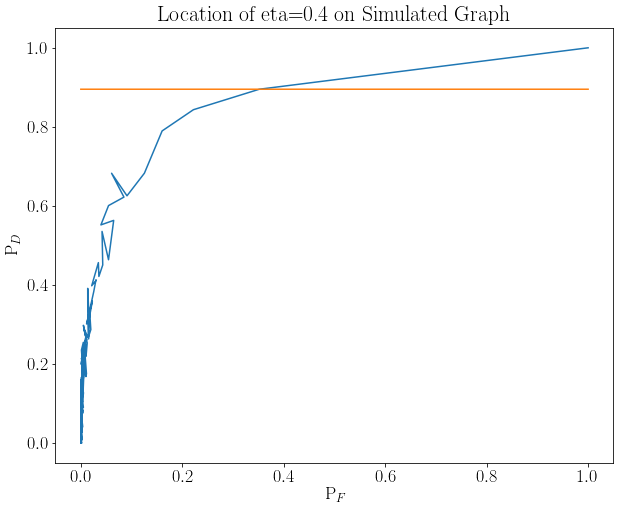

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(pf_snr[2, :], pd_snr[2, :])
plt.plot(pf_snr[2, :], np.ones((len(pf_snr[2, :]), 1)) * pd_snr[2, loc2])
plt.title('Location of eta=0.4  on Simulated Graph')
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.show()

/home/krishna/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


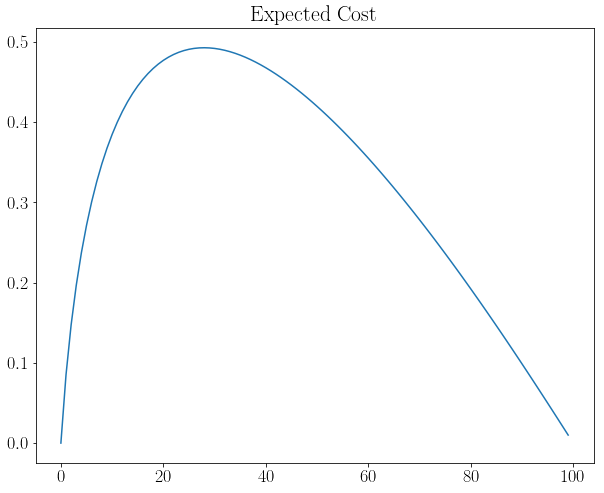

In [9]:
# Part D

a = 3
C01 = 10
C10 = 1
exp_C = np.zeros((1, 101))
n = 0
p  = np.arange(0, 1, 0.01)
q = 1 - p
log_inner = q/((C01 * p))
decision = (2*var_x*np.log(log_inner)+a*2)/(2*a);
p_d = 1-norm.cdf(decision,loc=a,scale=sig_x);
p_f = 1-norm.cdf(decision,loc=0,scale=sig_x);
exp_C = C01*p + C10*q*p_f - (C01)*p*p_d;

plt.figure(figsize=(10, 8))
plt.plot(exp_C)
plt.title("Expected Cost")
plt.show()


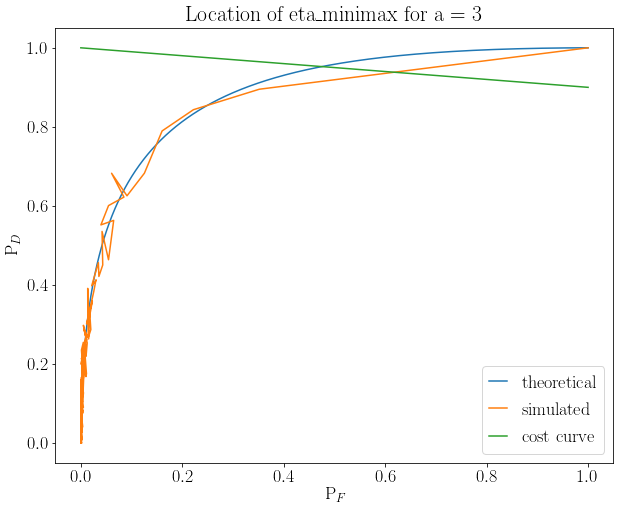

In [10]:
# Part E
# Minimax of eta and expected cost associated
p_d_temp = 1 - p_f_total[2, :]/10
loc_eta_minimax = np.where(np.abs(p_d_temp - p_d_total[2, :]) <=0.0002)
eta_minimax = eta1[loc_eta_minimax]
p1_minimax = 1 /(10 * eta_minimax + 1)

expected_cost_minimax = exp_C[np.where(p==np.round(p1_minimax*100)/100)]

plt.figure(figsize=(10, 8))
plt.plot(p_f_total[2, :], p_d_total[2, :], label='theoretical')
plt.plot(pf_snr[2, :], pd_snr[2, :], label='simulated')
plt.plot(p_f_total[2, :], p_d_temp, label='cost curve')
plt.legend()
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.title('Location of eta\_minimax for a = 3')
plt.show()

In [11]:
var_x = 1
var_z = 25
a = 1
p = 0.2
q = 1 - p
sig_x = np.sqrt(var_x)
sig_z = np.sqrt(var_z)

eta = q/p

def probnew(y, present, var_z=var_z):
    if present: 
        return (1/np.sqrt(2 * np.pi * var_x))*np.exp(-(y-a)**2/(2*var_x))
    else: 
        return (1/np.sqrt(2 * np.pi * var_z))*np.exp(-(y-a)**2/(2*var_z))

n_err = 0
trials = 1000

for ii in range(int(trials)): 
    if np.random.random() <= p: 
        y = a + np.random.normal(0, sig_x, 1)
        if probnew(y, True) * p < probnew(y, False) * q: 
            n_err+=1
    else: 
        y = a + np.random.normal(0, sig_z, 1); 
        if probnew(y, True) * p >= probnew(y, False) * q: 
            n_err+=1

prob_err = n_err/float(trials)
print("Simulated Probability of Error: ", prob_err)

# Theoretical Probability of Error with different means but same variances

if (sig_z/sig_x) <= eta: 
    prob_abs_given_present = 1
    prob_present_given_abs = 0
else: 
    x = np.sqrt(((2*var_z*var_x/(var_x-var_z))*np.log((sig_x/sig_z)*eta)));
    prob_abs_given_present = 2 * (1 - norm.cdf(x, loc=0, scale=sig_x))
    prob_present_given_absent = norm.cdf(x, 0, sig_z) - norm.cdf(-x, 0, sig_z)

prob_err_theo = prob_abs_given_present * p + prob_present_given_absent * q

print("Theoretical Probability of Error: ", prob_err_theo)
    


Simulated Probability of Error:  0.169
Theoretical Probability of Error:  0.18584372993066145


/home/krishna/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


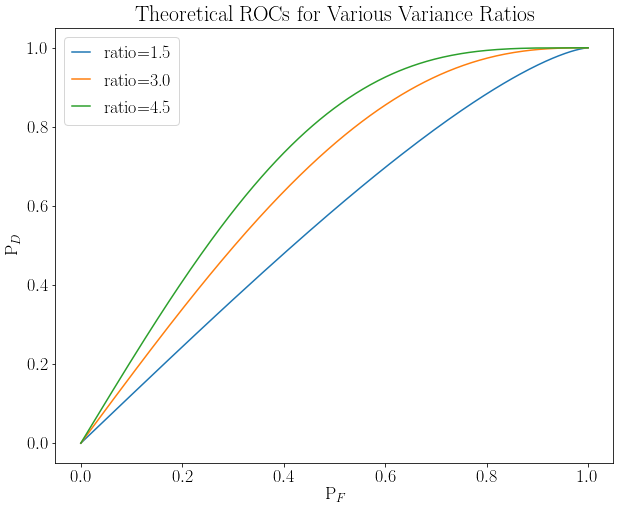

In [12]:
# Theoretical ROC Calculation

eta_vect = np.arange(0, 1000, 0.01) # Can't go to zero
n_eta = len(eta_vect);
p_d_eta = np.zeros((1,n_eta));
p_f_eta = np.zeros((1,n_eta));
p_d_var = np.zeros((3,n_eta));
p_f_var = np.zeros((3,n_eta));

for k, var_z in enumerate([1.5, 3.0, 4.5]):
    sig_z = np.sqrt(var_z)
    for n, eta in enumerate(eta_vect):       
        if (sig_z/sig_x) <= eta:
            p_d = 0;
            p_f = 0;

        else:
            x = np.sqrt(((2*var_z*var_x/(var_x-var_z))*np.log((sig_x/sig_z)*eta)));
            p_d = norm.cdf(x, loc=0, scale=sig_x)-norm.cdf(-x, loc=0, scale=sig_x);
            p_f = norm.cdf(x, loc=0, scale=sig_z)-norm.cdf(-x, loc=0, scale=sig_z);
        p_d_eta[0,n] = p_d;
        p_f_eta[0,n] = p_f;
    p_d_var[k,:] = p_d_eta[0,:];
    p_f_var[k,:] = p_f_eta[0,:];   

plt.figure(figsize=(10, 8))
for n, ratio in enumerate([1.5, 3.0, 4.5]):
    plt.plot(p_f_var[n, :], p_d_var[n, :], label='ratio=%0.1f' % ratio)
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.title('Theoretical ROCs for Various Variance Ratios')
plt.legend()
plt.show()
#??????

In [13]:
trials = 1000;
k = 0;
eta = np.arange(0, 1000, 0.5)
l_eta = len(eta);
pd_snr = np.zeros((3,l_eta));
pf_snr = np.zeros((3,l_eta))

for k, var_z in enumerate([1.5, 3.0, 4.5]):
    sig_z = np.sqrt(var_z)
    pd_eta = np.zeros((1,l_eta))
    pf_eta = np.zeros((1,l_eta))
    for n, e in enumerate(eta): 
        nh1h1 = 0;
        nh1h0 = 0;
        n_present = 0;
        n_absent = 0;
        for ii in range(trials):        
            if np.random.random() <= p:
                n_present+=1
                y = a + np.random.normal(0, sig_x, 1);
                if probnew(y, True, var_z) >= probnew(y, False, var_z)*e:
                    nh1h1+=1
            else:
                n_absent+=1
                y = a + np.random.normal(0,sig_z, 1);
                if probnew(y, True, var_z) >= probnew(y, False, var_z)*e:
                    nh1h0+=1;
        pd_eta[0,n]= nh1h1/n_present;
        pf_eta[0,n]= nh1h0/n_absent;
    pd_snr[k,:]= pd_eta;
    pf_snr[k,:]= pf_eta;

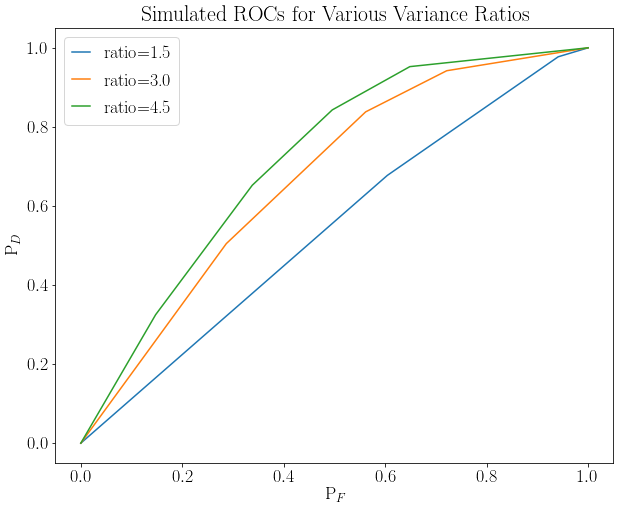

In [14]:
plt.figure(figsize=(10, 8))
for n, ratio in enumerate([1.5, 3.0, 4.5]):
    plt.plot(pf_snr[n, :], pd_snr[n, :], label='ratio=%0.1f' % ratio)
plt.xlabel('P_F')
plt.ylabel('P_D')
plt.title('Simulated ROCs for Various Variance Ratios')
plt.legend()
plt.show()